In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import seaborn as sns
from scipy import stats

from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA

from itertools import combinations
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
import statsmodels.api as sm
import statsmodels.tsa.api as smt
pd.options.display.float_format = '{:.2f}'.format

In [2]:
df_payroll_sums = pd.read_csv(r"C:\Users\LENOVO\Desktop\Payroll_PFE\Payroll Analysis & Forecasting\1. Data\df_payroll_sums.csv")
df_payroll_sums['PERPAI'] = pd.to_datetime(df_payroll_sums['PERPAI'], format='%Y-%m-%d')

In [122]:
# 2021 --- 2023
df_payroll_sums = pd.read_csv(r"C:\Users\LENOVO\Desktop\Payroll_PFE\Payroll Analysis & Forecasting\1. Data\df_payroll_sums_all.csv")
df_payroll_sums['PERPAI'] = pd.to_datetime(df_payroll_sums['PERPAI'], format='%Y-%m-%d')

In [3]:
def plot_many(List_names,s=1,p=0):
    l_p=[]
    l_s=[]
    for col in List_names :
        l_s.append(pd.Series(list(df_SAL[col]), index=list(df_SAL['PERPAI'])))
        l_p.append(pd.Series(list(df_payroll_sums[col]), index=list(df_payroll_sums['PERPAI'])))

    plt.subplots(1, 1, figsize=(25, 10))
    
    if s==1 & p==1 : 
        for i in range(len(l_s)) : 
            plt.plot(l_s[i],label=List_names[i]+'_SAL')
            plt.plot(l_p[i],label=List_names[i]+'_PAT')
            
    elif s==1 :
         for i in range(len(l_s)) : 
            plt.plot(l_s[i],label=List_names[i])
            
        
    elif p==1 :
         for i in range(len(l_p)) : 
            plt.plot(l_p[i],label=List_names[i])

    plt.legend()
    plt.show()
            

In [4]:
l_cols = df_payroll_sums.columns

In [ ]:
L_prime = []
for col in df_SAL.columns :
    if col[:5].lower() == 'prime' or  col[:2].lower() == 'p.':
        L_prime.append(col)

l_cols_1 = [col for col in l_cols if col not in L_prime]

In [ ]:
L_Indemnité = []
for col in l_cols_1 :
    if col[:3].lower() == 'ind' :
        L_Indemnité.append(col)
        
l_cols_2 = [col for col in l_cols_1 if col not in L_Indemnité]

In [5]:
def test_stationarity(timeseries):
    #Determing rolling statistics
    MA = timeseries.rolling(window = 12).mean()
    MSTD = timeseries.rolling(window = 12).std()

    #Plot rolling statistics:
    plt.figure(figsize=(15,5))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(MA, color='red', label='Rolling Mean')
    std = plt.plot(MSTD, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

# I. Payroll Study & Forecast

## 1.Based on 2022 - 2023

NameError: name 'fig' is not defined

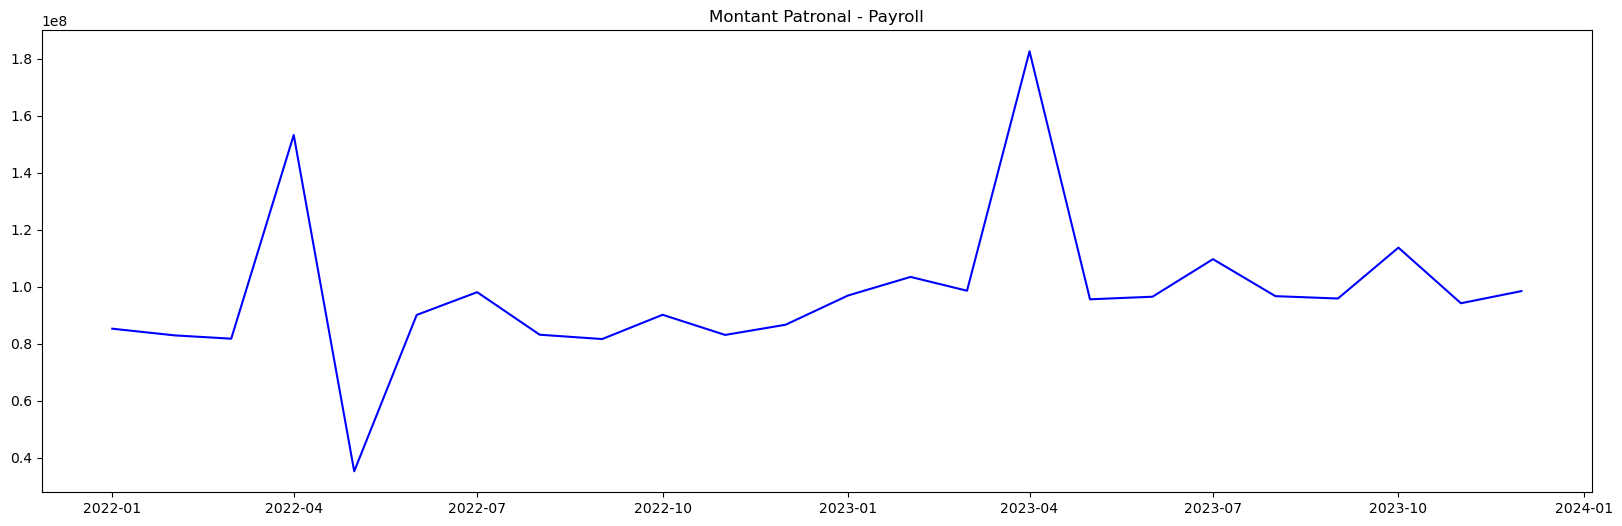

In [6]:
# PAT
plt.subplots(1, 1, figsize=(20, 6))
data = pd.Series(list(df_payroll_sums['Masse salariale']), index=list(df_payroll_sums['PERPAI']))

plt.plot(data, color='b')
#plt.plot(data1)
plt.title('Montant Patronal - Payroll')

fig.savefig("")

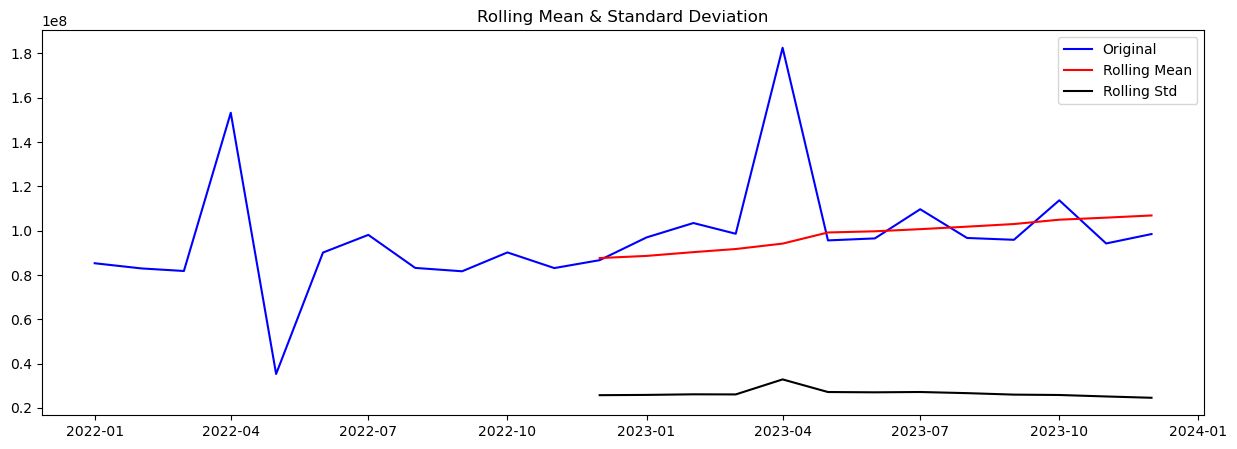

Results of Dickey-Fuller Test:
Test Statistic                -5.57
p-value                        0.00
#Lags Used                     0.00
Number of Observations Used   23.00
Critical Value (1%)           -3.75
Critical Value (5%)           -3.00
Critical Value (10%)          -2.64
dtype: float64


In [8]:
test_stationarity(data)

### a. Creating forecast & train indexes

In [7]:
# PAT
predict_start_date = pd.to_datetime('2023-09-01')
predict_end_date = pd.to_datetime('2024-12-01')

df_tr = df_payroll_sums[df_payroll_sums['PERPAI'] < predict_start_date]
df_forecast = df_payroll_sums[df_payroll_sums['PERPAI'] >= predict_start_date]

data_train = pd.Series(list(df_tr['Masse salariale']), index=list(df_tr['PERPAI'] ))
data_forecast = pd.Series(list(df_forecast['Masse salariale']), index=list(df_forecast['PERPAI'] ))

In [8]:
train_index = pd.date_range(start=data_train.index[0], end=data_train.index[-1], freq='MS')
forecast_index = pd.date_range(start=data_forecast.index[0], end=predict_end_date, freq='MS')

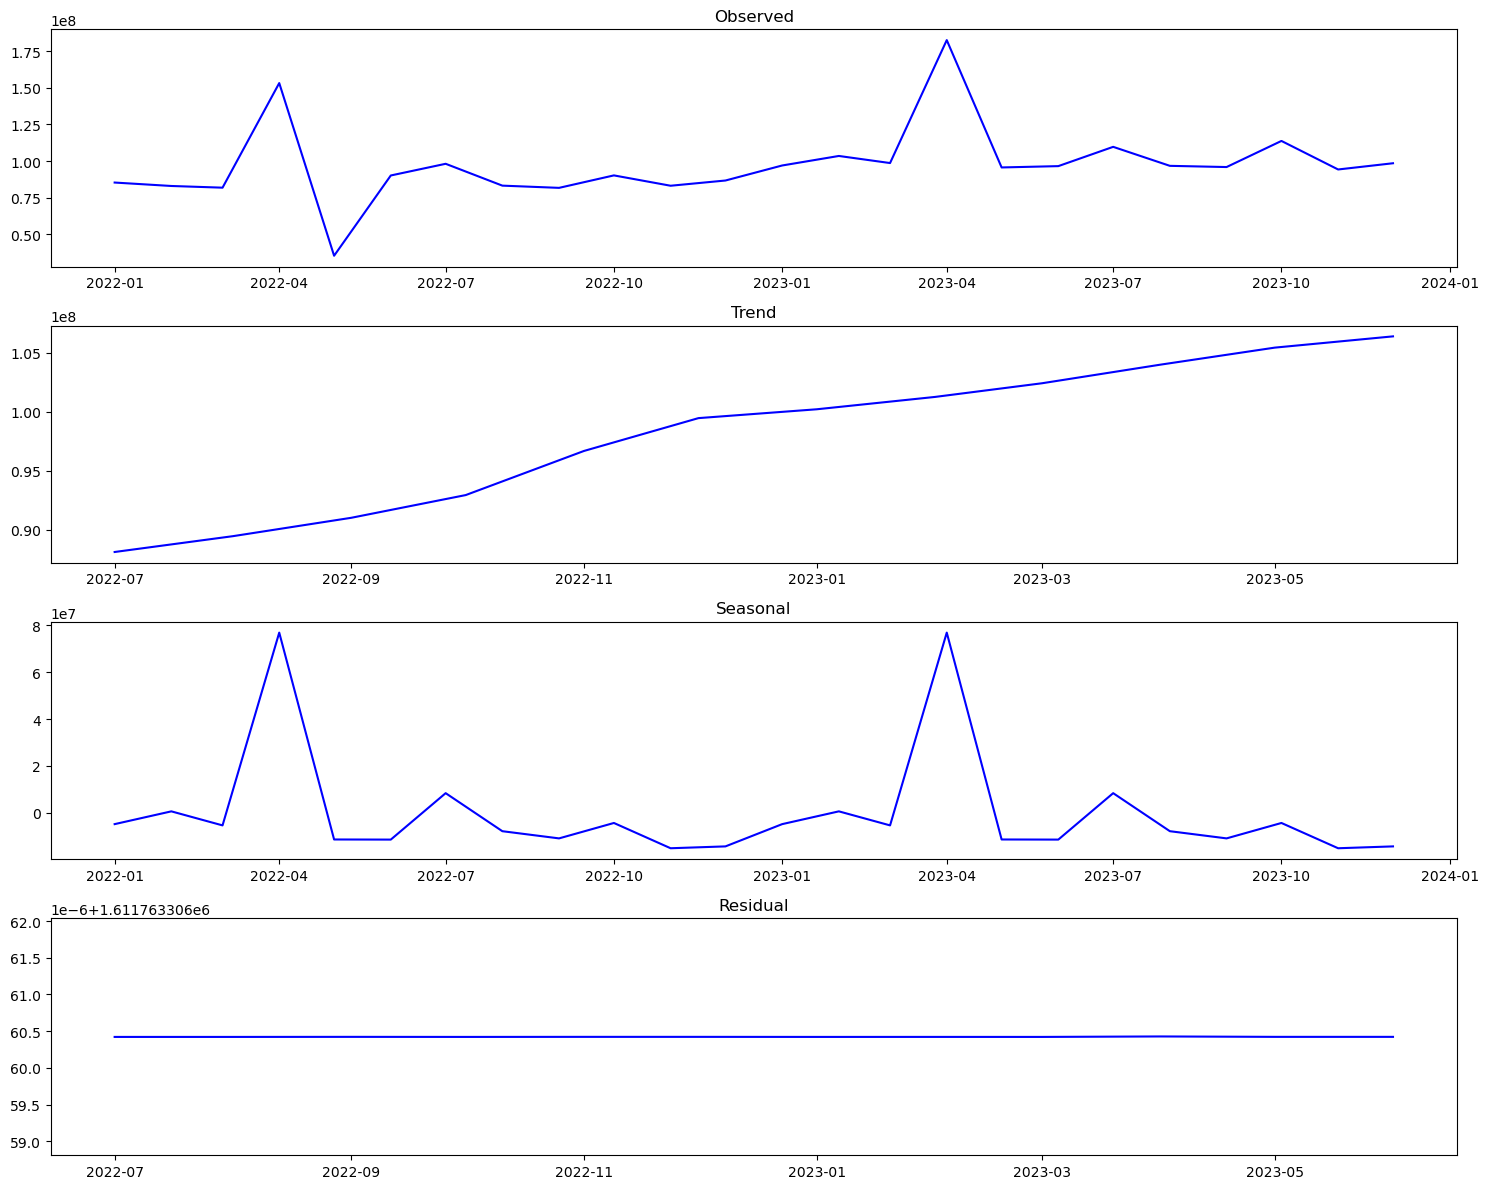

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Perform seasonal decomposition
result = seasonal_decompose(data, model='additive', period=12)  # Assuming daily seasonality for hourly data

# Create subplots
fig, axes = plt.subplots(4, 1, figsize=(15, 12))

# Plot observed data
axes[0].plot(result.observed,color='b')
axes[0].set_title('Observed')

# Plot trend data
axes[1].plot(result.trend,color='b')
axes[1].set_title('Trend')

# Plot seasonal data
axes[2].plot(result.seasonal,color='b')
axes[2].set_title('Seasonal')

# Plot residual data
axes[3].plot(result.resid,color='b')
axes[3].set_title('Residual')

# Adjust layout and show plot
plt.tight_layout()
plt.show()


fig.savefig("Payroll cost.png")

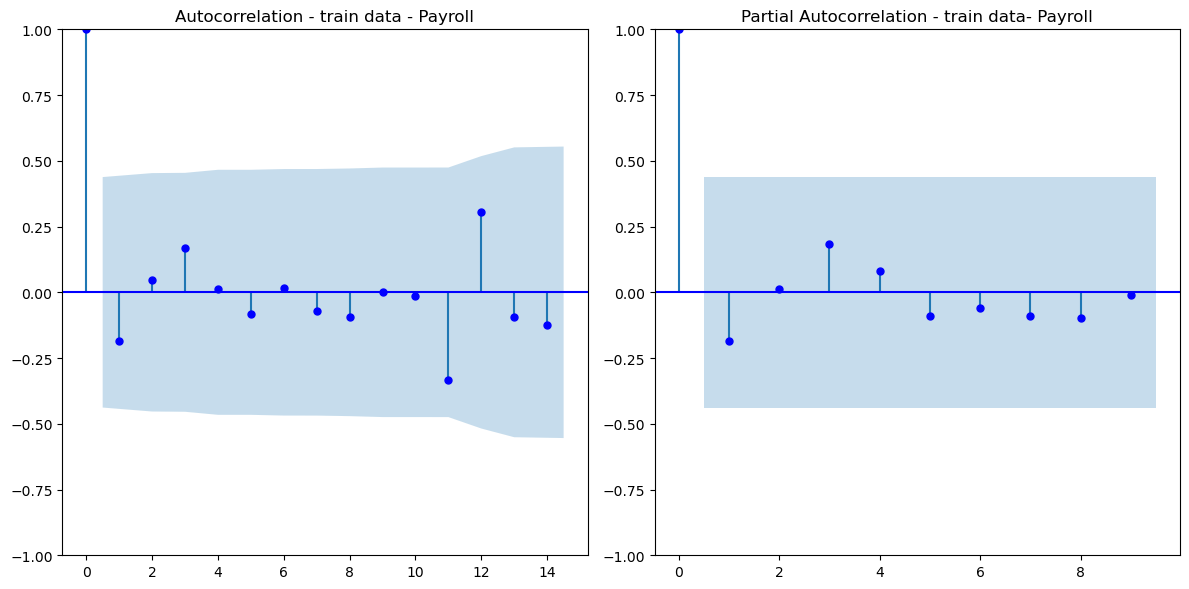

In [10]:
# Calculate the ACF (via statsmodel)
#plot_acf(data)

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot autocorrelation in the top-left subplot
plot_acf(data_train, ax=axes[0], color='b')
axes[0].set_title('Autocorrelation - train data - Payroll')

# Plot partial autocorrelation in the top-right subplot
plot_pacf(data_train, ax=axes[1], lags=9, color='b')  
axes[1].set_title('Partial Autocorrelation - train data- Payroll')


plt.tight_layout()
fig.savefig("ACF - PACF - Payroll cost.png")

plt.show()

## Interpretation 
- The Autocorrelation graph shows the first lag (after lag 0) negatively correlating with its precedent, and lage 3, afterwhich, lags tend to decrease until they nullify, until lag 11.
--> We will be choosing order : q=1 or q=3 for the MA ARIMA component, and order Q=1 for the Seasonal SARIMA component, with seasonality = 11

MA(q=1) ; SMA(Q=1) ; s=11 

- The PArtial-Autocorrelation graph shows the first lag (after lag 0) negatively correlating with its precedent, and lage 3, afterwhich, lags tend to decrease until they nullify,
--> We will be choosing p=1 for the AR ARIMA component, and we can no longer further lags for the seasonality component.
AR(p=1)

####  **Which sums up to : ARIMA(p=1,I,q=1) SARIMA(P,I,Q=1)s=11**

### b. Differencing

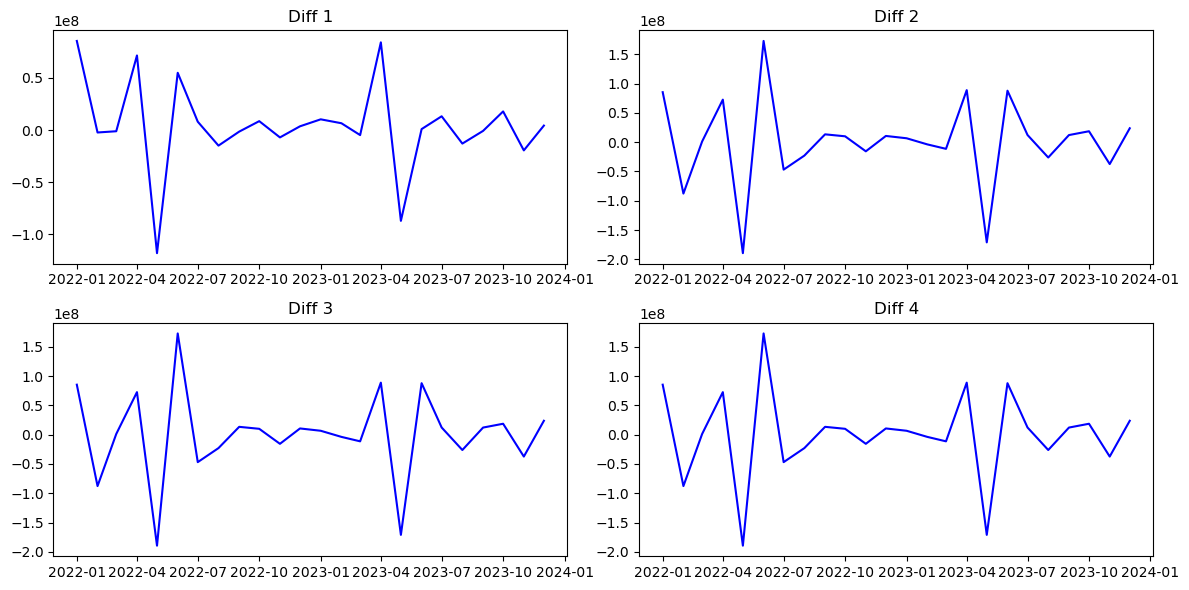

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 6))

# Calculate the first and second differenced data
data_diff = data.diff().fillna(data_train)
data_diff2 = data_diff.diff().fillna(data_diff)
data_diff3 = data_diff.diff().fillna(data_diff2)
data_diff4 = data_diff.diff().fillna(data_diff3)

axes[0, 0].plot(data_diff,color='b')
axes[0, 0].set_title('Diff 1')

# Plot second differenced data on the second subplot
axes[0, 1].plot(data_diff2,color='b')
axes[0, 1].set_title('Diff 2')

# Plot third differenced data on the third subplot
axes[1, 0].plot(data_diff3,color='b')
axes[1, 0].set_title('Diff 3')

# Plot fourth differenced data on the fourth subplot
axes[1, 1].plot(data_diff4,color='b')
axes[1, 1].set_title('Diff 4')


# Adjust layout and show plot
plt.tight_layout()

fig.savefig("Differencing - Payroll cost.png")
plt.show()


In [19]:
'''
plt.subplots(1, 1, figsize=(12, 6))

data_diff=data.diff().fillna(data)
data_diff2=data.diff().fillna(data_diff)
plt.plot(data_diff2)

plt.title('Differenced')
plt.show()
'''

"\nplt.subplots(1, 1, figsize=(12, 6))\n\ndata_diff=data.diff().fillna(data)\ndata_diff2=data.diff().fillna(data_diff)\nplt.plot(data_diff2)\n\nplt.title('Differenced')\nplt.show()\n"

In [12]:
from statsmodels.tsa.stattools import adfuller

def perform_adf_test(series):
    result = adfuller(series)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])

In [13]:
perform_adf_test(data_diff)
perform_adf_test(data_diff2)
perform_adf_test(data_diff3)
perform_adf_test(data_diff4)

ADF Statistic: -6.738578
p-value: 0.000000
ADF Statistic: -1.050347
p-value: 0.734462
ADF Statistic: -1.050347
p-value: 0.734462
ADF Statistic: -1.050347
p-value: 0.734462


## Interpretation : 
We will be choosing order 0 differencing, since without differencing, it gives a p-value of 0.0 < 5% , which nullifies the null hypothesis : It is unlikely to have a p-value as low as 5% by mere chance, therefore, the series is stationnary.

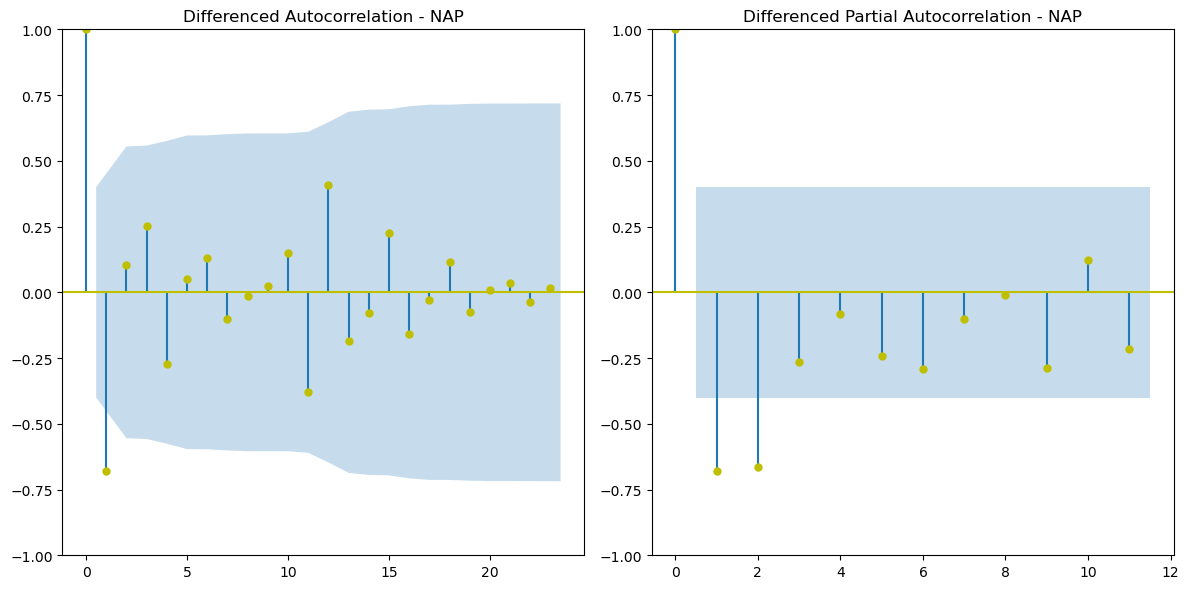

In [14]:
# Calculate the ACF (via statsmodel)
#plot_acf(data)

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot autocorrelation in the top-left subplot
plot_acf(data_diff2, ax=axes[0], lags=23, color='y')
axes[0].set_title('Differenced Autocorrelation - NAP')

# Plot partial autocorrelation in the top-right subplot
plot_pacf(data_diff2, ax=axes[1], lags=11, color='y')  
axes[1].set_title('Differenced Partial Autocorrelation - NAP')


plt.tight_layout()

fig.savefig("Diff ACF - Payroll cost.png")
plt.show()

### c. SARIMA fitting

In [15]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(data_train, order=(1,0,1), seasonal_order=(1,0,2,12))
model_fit = model.fit()

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


In [16]:
print(model_fit.summary())

                                        SARIMAX Results                                        
Dep. Variable:                                       y   No. Observations:                   20
Model:             SARIMAX(1, 0, 1)x(1, 0, [1, 2], 12)   Log Likelihood                -372.180
Date:                                 Tue, 25 Jun 2024   AIC                            756.360
Time:                                         09:10:19   BIC                            762.335
Sample:                                     01-01-2022   HQIC                           757.527
                                          - 08-01-2023                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9918      0.611      1.623      0.105      -0.206       2

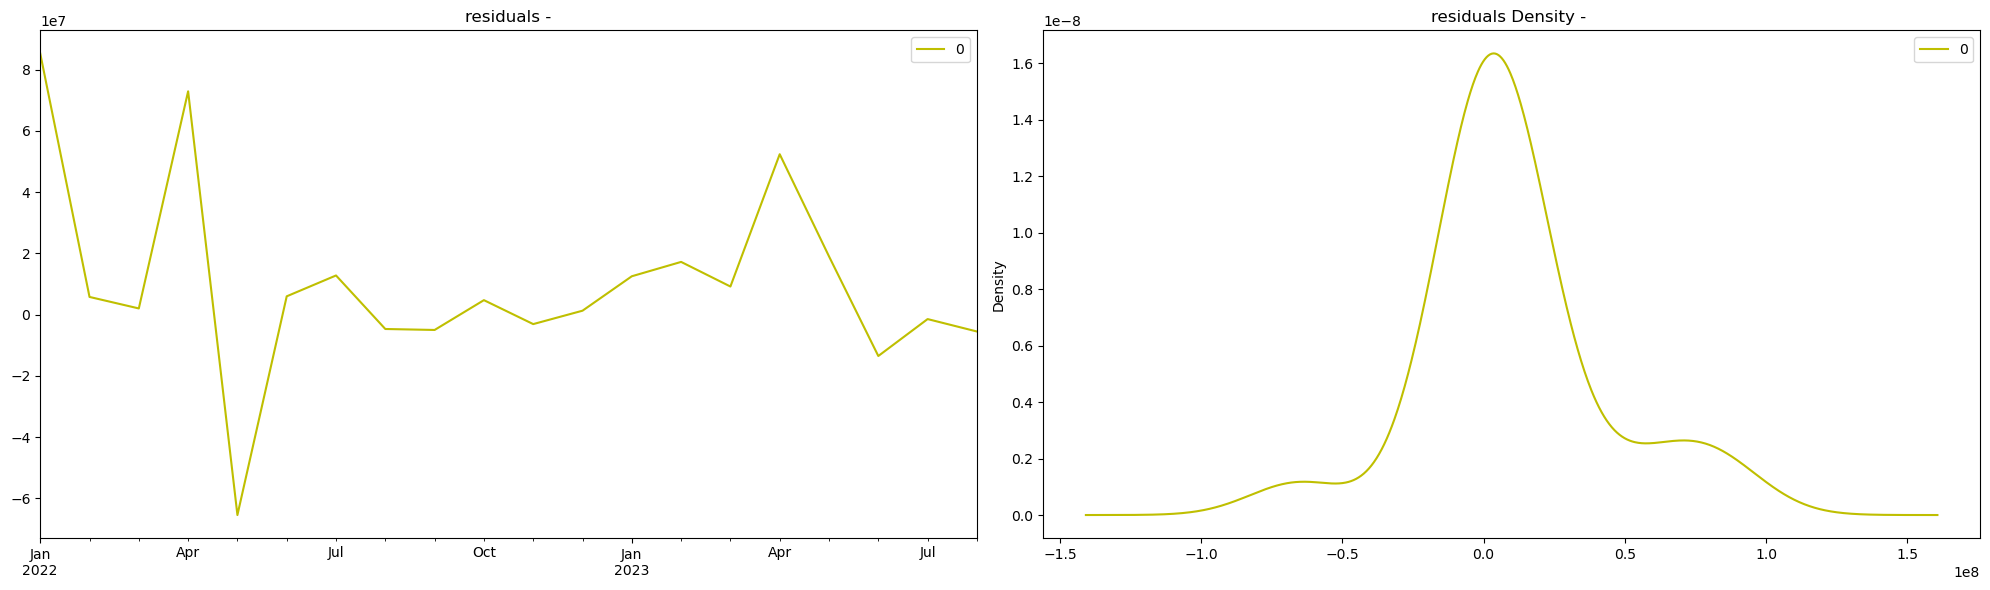

In [17]:
fig, axes = plt.subplots(1, 2, figsize=(20, 6))

# line plot of residuals
residuals = pd.DataFrame(model_fit.resid)
residuals.plot(ax=axes[0],c='y')
axes[0].set_title('residuals -')

# density plot of residuals
residuals.plot(kind='kde',ax=axes[1],c='y')
axes[1].set_title('residuals Density - ')

plt.tight_layout()

fig.savefig("Residuals - Payroll cost.png")

plt.show()

In [18]:
# summary stats of residuals
print(residuals.describe())

                 0
count        20.00
mean   10109300.66
std    31630699.89
min   -65464714.70
25%    -3506819.09
50%     5240141.84
75%    13883252.43
max    85299262.59


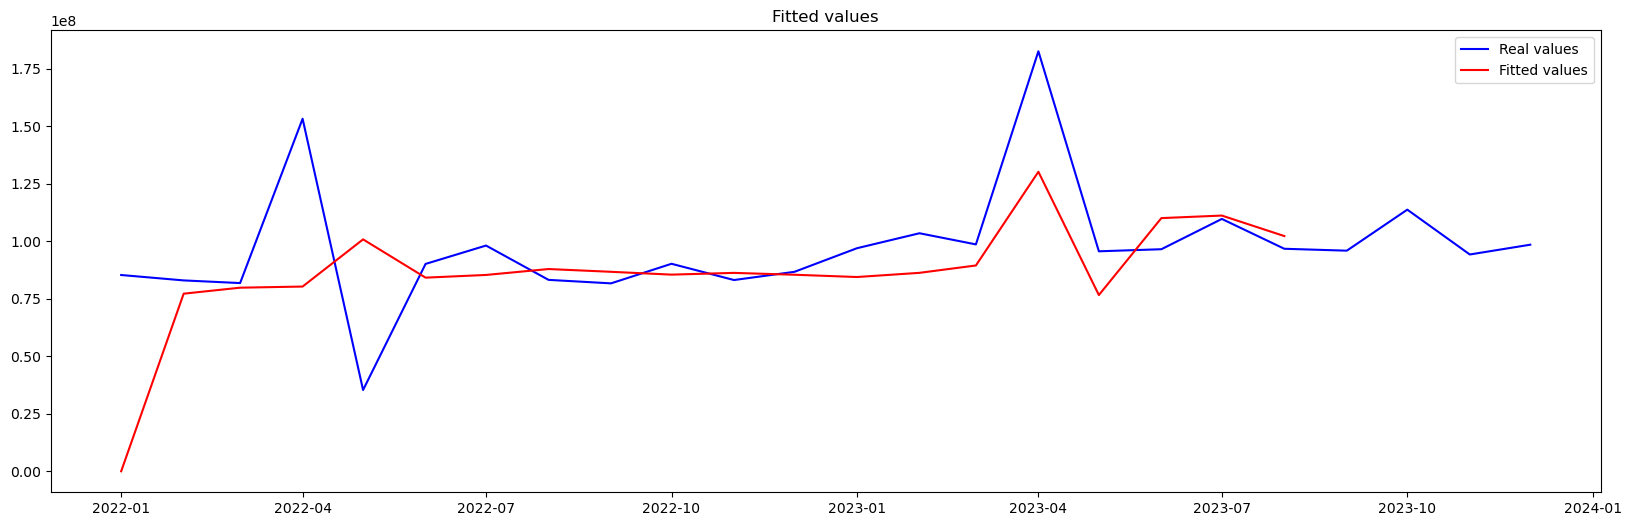

In [20]:
plt.subplots(1, 1, figsize=(20, 6))

plt.plot(data,color='b')
plt.plot(model_fit.fittedvalues, color='r')
plt.title('Fitted values')
plt.legend(['Real values','Fitted values'])

plt.savefig("fitted values - Payroll cost.png")
plt.show()

### d. Forecast

In [31]:
forecast = model_fit.predict(start=forecast_index[0], end=forecast_index[-1])

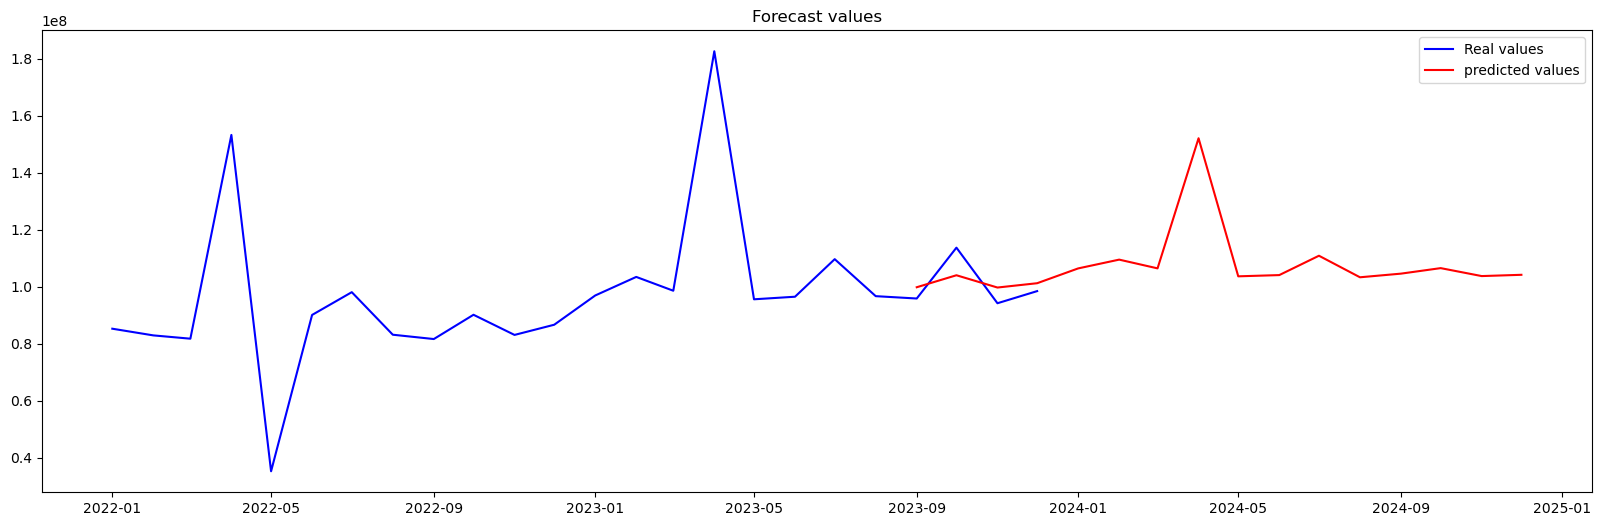

In [40]:
plt.subplots(1, 1, figsize=(20, 6))

plt.plot(data,color='b')
plt.plot(forecast, color='r')
plt.title('Forecast values')
plt.legend(['Real values','predicted values'])

plt.savefig("forecast values - Payroll cost.png")

plt.show()

### e. Evaluate Forecast

In [36]:
def evaluate_forecast(col, forecast):
    # compute mae
    mae_train = mean_absolute_error(train[col].values, forecast[:len(train)])
    mae_val = mean_absolute_error(val[col].values, forecast[-len(val):])

    # compute mse
    mse_train = mean_squared_error(train[col].values, forecast[:len(train)])
    mse_val = mean_squared_error(val[col].values, forecast[-len(val):])

    # compute mean_absolute_percentage_error
    mape_train = mean_absolute_percentage_error(train[col].values, forecast[:len(train)])
    mape_val = mean_absolute_percentage_error(val[col].values, forecast[-len(val):])

    # make a df to store the results
    df = pd.DataFrame({'mae': [mae_train, mae_val], 'mse': [mse_train, mse_val], 'mape': [mape_train, mape_val]}, index=['train', 'val'])
    return df

## DEMO

In [37]:
def Forecast_Salary(Forecast_Start_date,Forecast_End_date) : 

    Forecast_Start_date = pd.to_datetime(Forecast_Start_date, format='%Y-%m-%d')
    Forecast_End_date = pd.to_datetime(Forecast_End_date, format='%Y-%m-%d')
    
    forecast_index = pd.date_range(start=Forecast_Start_date, end=Forecast_End_date, freq='MS')
    forecast = model_fit.predict(start=forecast_index[0], end=forecast_index[-1])
    
    plt.subplots(1, 1, figsize=(20, 6))

    plt.plot(data,color='b')
    plt.plot(forecast, color='r')
    plt.title('Forecast values')
    plt.legend(['Real values','predicted values'])

    plt.savefig("long forecast - Payroll cost.png")
    plt.show()

In [38]:
predict_start_date = pd.to_datetime('2023-06-01')
predict_end_date = pd.to_datetime('2023-12-01')

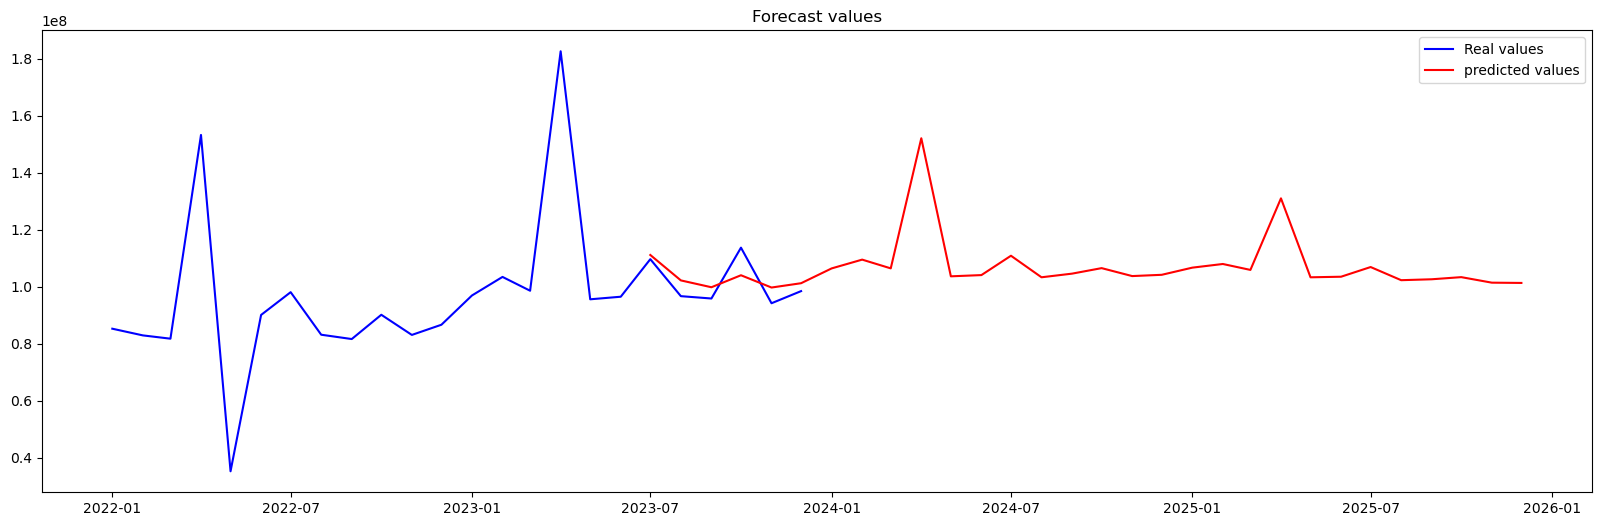

In [39]:
Forecast_Salary('2023-07-01','2025-12-01')

## 2.Based on 2021 - 2022 - 2023

In [ ]:
# PAT
plt.subplots(1, 1, figsize=(20, 6))
data = pd.Series(list(df_payroll_sums['Masse salariale']), index=list(df_payroll_sums['PERPAI']))

plt.plot(data)
#plt.plot(data1)
plt.title('Montant Patronal - Payroll')

In [ ]:
test_stationarity(data)

Text(0.5, 1.0, 'Montant Salarial - Net A Payer')

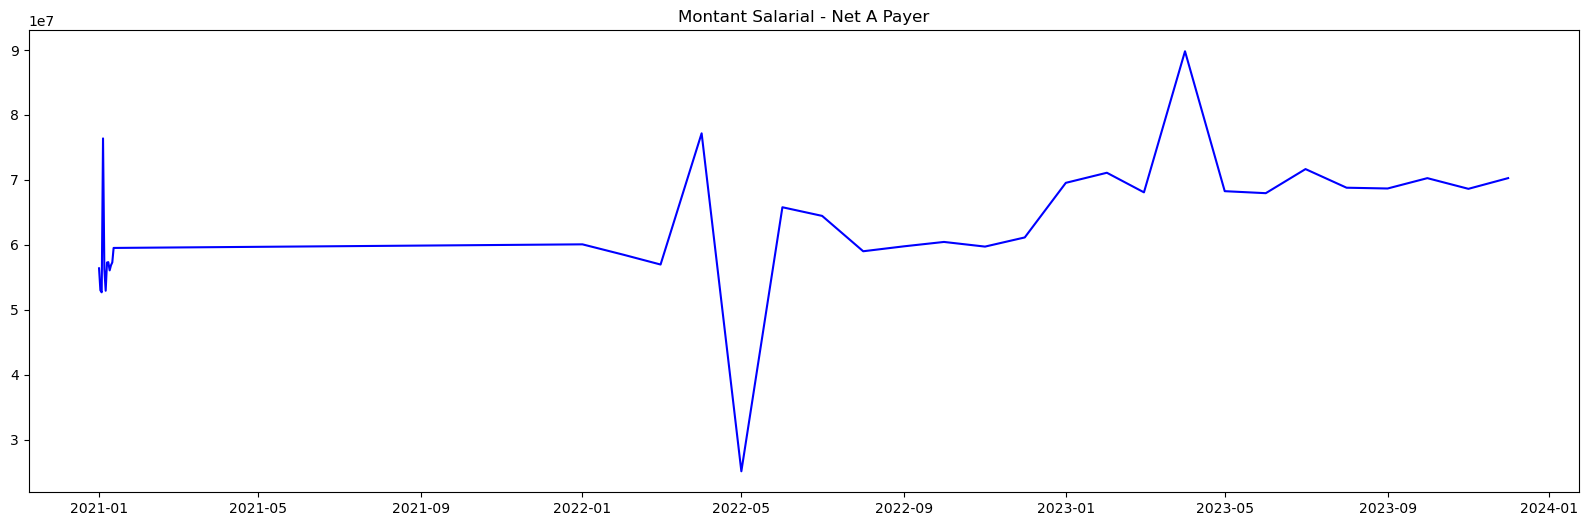

In [198]:
# SAL
#df_SAL = df_SAL.set_index(["PERPAI"])
plt.subplots(1, 1, figsize=(20, 6))
data = pd.Series(list(df_SAL['Masse salariale']), index=list(df_SAL['PERPAI']))

plt.plot(data,  color='b')
#plt.plot(data1)
plt.title('Montant Salarial - Net A Payer')

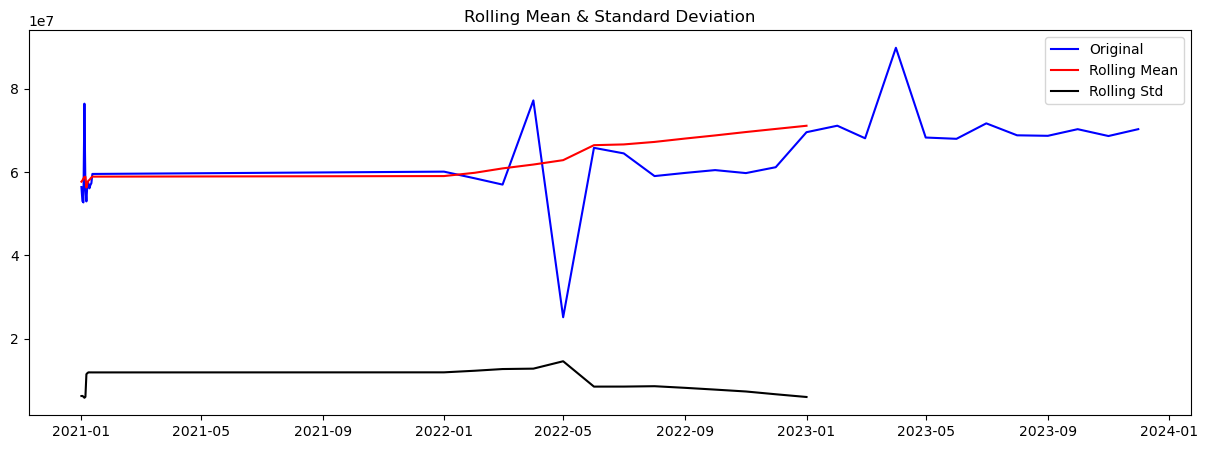

Results of Dickey-Fuller Test:
Test Statistic                -5.42
p-value                        0.00
#Lags Used                     0.00
Number of Observations Used   35.00
Critical Value (1%)           -3.63
Critical Value (5%)           -2.95
Critical Value (10%)          -2.61
dtype: float64


In [103]:
test_stationarity(data)

### a. Creating forecast & train indexes

In [199]:
# SAL
predict_start_date = pd.to_datetime('2023-08-01')
predict_end_date = pd.to_datetime('2023-11-01')

df_tr = df_SAL[df_SAL['PERPAI'] < predict_start_date]
df_forecast = df_SAL[df_SAL['PERPAI'] >= predict_start_date]

data_train = pd.Series(list(df_tr['Masse salariale']), index=list(df_tr['PERPAI'] ))
data_forecast = pd.Series(list(df_forecast['Masse salariale']), index=list(df_forecast['PERPAI'] ))

In [187]:
train_index = pd.date_range(start=data_train.index[0], end=data_train.index[-1], freq='MS')
#forecast_index = pd.date_range(start=data_forecast.index[0], end=predict_end_date, freq='MS')
forecast_index = pd.date_range(start=predict_start_date, end=predict_end_date, freq='MS')

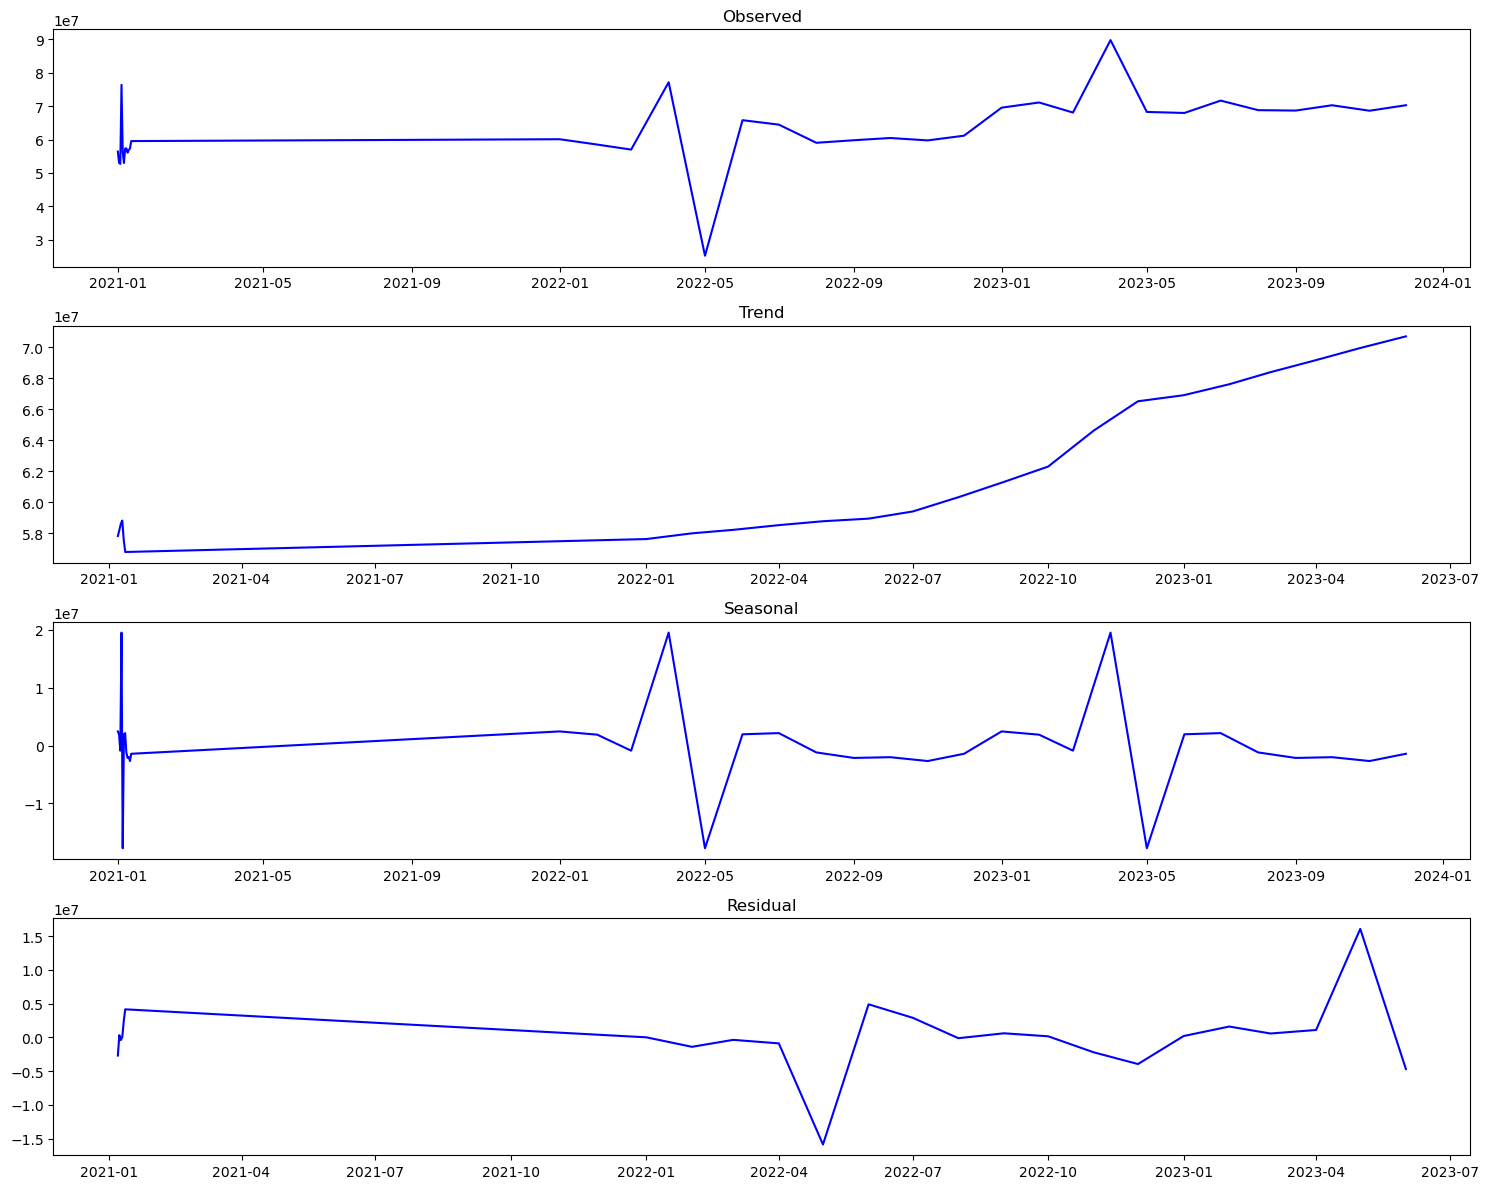

In [170]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Perform seasonal decomposition
result = seasonal_decompose(data, model='additive', period=12)  # Assuming daily seasonality for hourly data

# Create subplots
fig, axes = plt.subplots(4, 1, figsize=(15, 12))

# Plot observed data
axes[0].plot(result.observed,  color='b')
axes[0].set_title('Observed')

# Plot trend data
axes[1].plot(result.trend,  color='b')
axes[1].set_title('Trend')

# Plot seasonal data
axes[2].plot(result.seasonal,  color='b')
axes[2].set_title('Seasonal')

# Plot residual data
axes[3].plot(result.resid,  color='b')
axes[3].set_title('Residual')

# Adjust layout and show plot
plt.tight_layout()
plt.show()


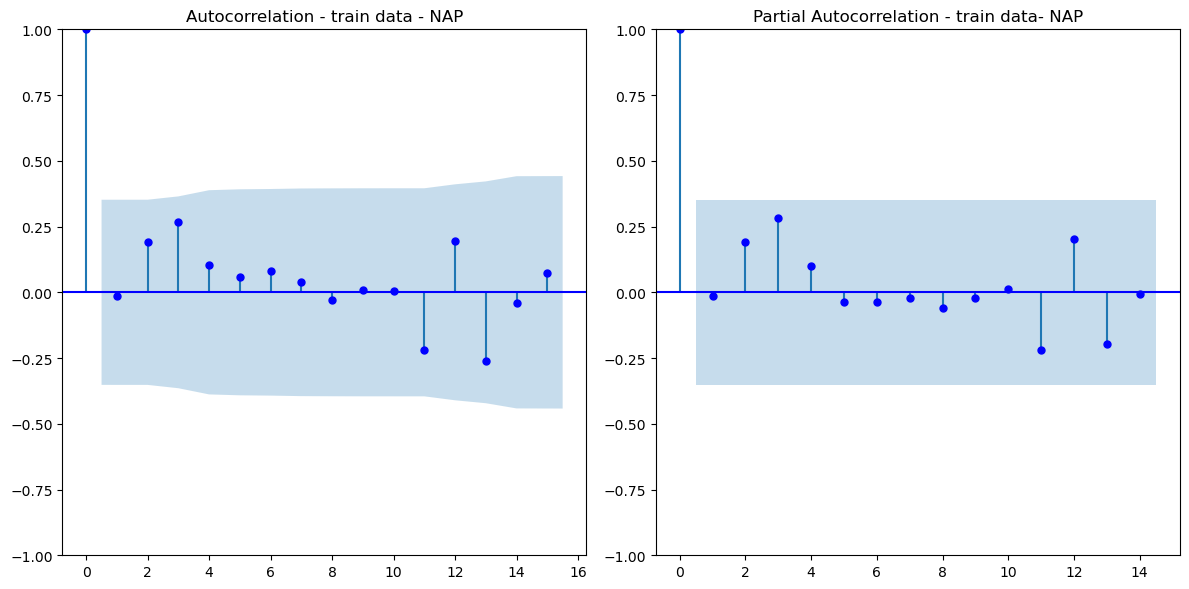

In [171]:
# Calculate the ACF (via statsmodel)
#plot_acf(data)

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot autocorrelation in the top-left subplot
plot_acf(data_train, ax=axes[0],  color='b')
axes[0].set_title('Autocorrelation - train data - NAP')

# Plot partial autocorrelation in the top-right subplot
plot_pacf(data_train, ax=axes[1], lags=14,  color='b')  
axes[1].set_title('Partial Autocorrelation - train data- NAP')


plt.tight_layout()
plt.show()

### b. Differencing

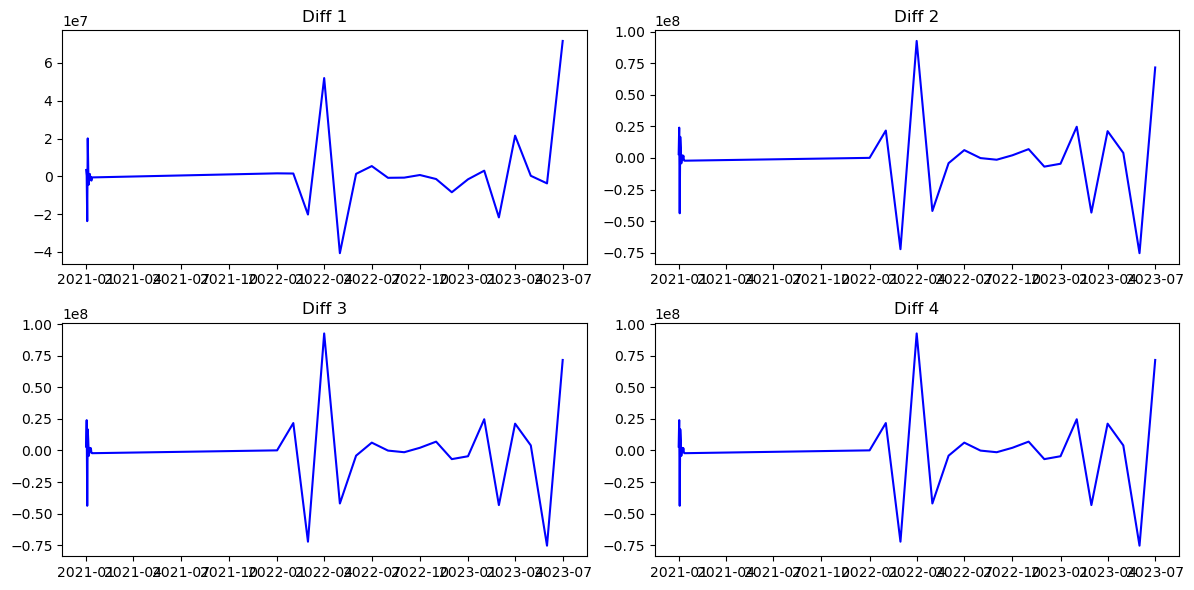

In [201]:
import pandas as pd
import matplotlib.pyplot as plt

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 6))

# Calculate the first and second differenced data
data_diff = data_train.diff().fillna(data_train)
data_diff2 = data_diff.diff().fillna(data_diff)
data_diff3 = data_diff.diff().fillna(data_diff2)
data_diff4 = data_diff.diff().fillna(data_diff3)

axes[0, 0].plot(data_diff, color='b')
axes[0, 0].set_title('Diff 1')

# Plot second differenced data on the second subplot
axes[0, 1].plot(data_diff2, color='b')
axes[0, 1].set_title('Diff 2')

# Plot third differenced data on the third subplot
axes[1, 0].plot(data_diff3, color='b')
axes[1, 0].set_title('Diff 3')

# Plot fourth differenced data on the fourth subplot
axes[1, 1].plot(data_diff4, color='b')
axes[1, 1].set_title('Diff 4')


# Adjust layout and show plot
plt.tight_layout()
plt.show()


In [173]:
from statsmodels.tsa.stattools import adfuller

def perform_adf_test(series):
    result = adfuller(series)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])

In [202]:
data_diff = data_train.diff().dropna()
data_diff2 = data_diff.diff().dropna()
data_diff3 = data_diff2.diff().dropna()
data_diff4 = data_diff3.diff().dropna()

perform_adf_test(data_diff)
perform_adf_test(data_diff2)
perform_adf_test(data_diff3)
perform_adf_test(data_diff4)

ADF Statistic: -5.666323
p-value: 0.000001
ADF Statistic: -3.549048
p-value: 0.006813
ADF Statistic: -3.506216
p-value: 0.007829
ADF Statistic: -3.518094
p-value: 0.007534


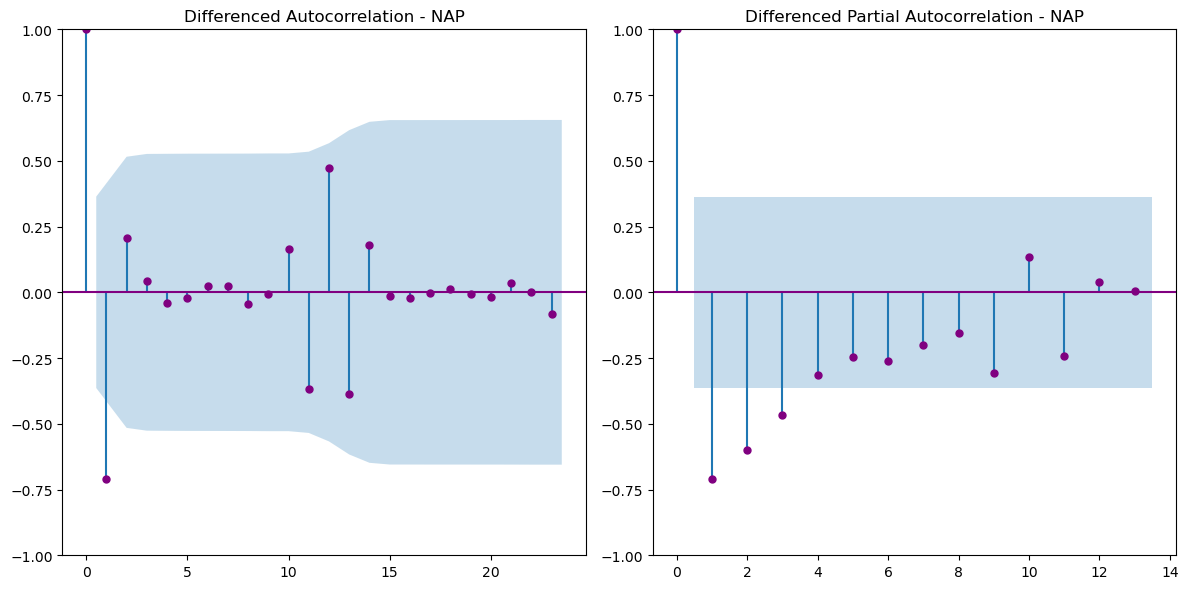

In [204]:
# Calculate the ACF (via statsmodel)
#plot_acf(data)

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot autocorrelation in the top-left subplot
plot_acf(data_diff2, ax=axes[0], lags=23, color='purple')
axes[0].set_title('Differenced Autocorrelation - NAP')

# Plot partial autocorrelation in the top-right subplot
plot_pacf(data_diff2, ax=axes[1], lags=13, color='purple')  
axes[1].set_title('Differenced Partial Autocorrelation - NAP')


plt.tight_layout()
plt.show()

### c. SARIMA fitting

In [205]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(data_train, order=(2,1,2), seasonal_order=(1,0,1,12))
model_fit = model.fit()

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-

In [206]:
print(model_fit.summary())

                                      SARIMAX Results                                       
Dep. Variable:                                    y   No. Observations:                   31
Model:             SARIMAX(2, 1, 2)x(1, 0, [1], 12)   Log Likelihood                -533.159
Date:                              Fri, 24 May 2024   AIC                           1080.318
Time:                                      03:02:57   BIC                           1090.126
Sample:                                           0   HQIC                          1083.455
                                               - 31                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7257      0.841     -0.863      0.388      -2.374       0.923
ar.L2         -0.42

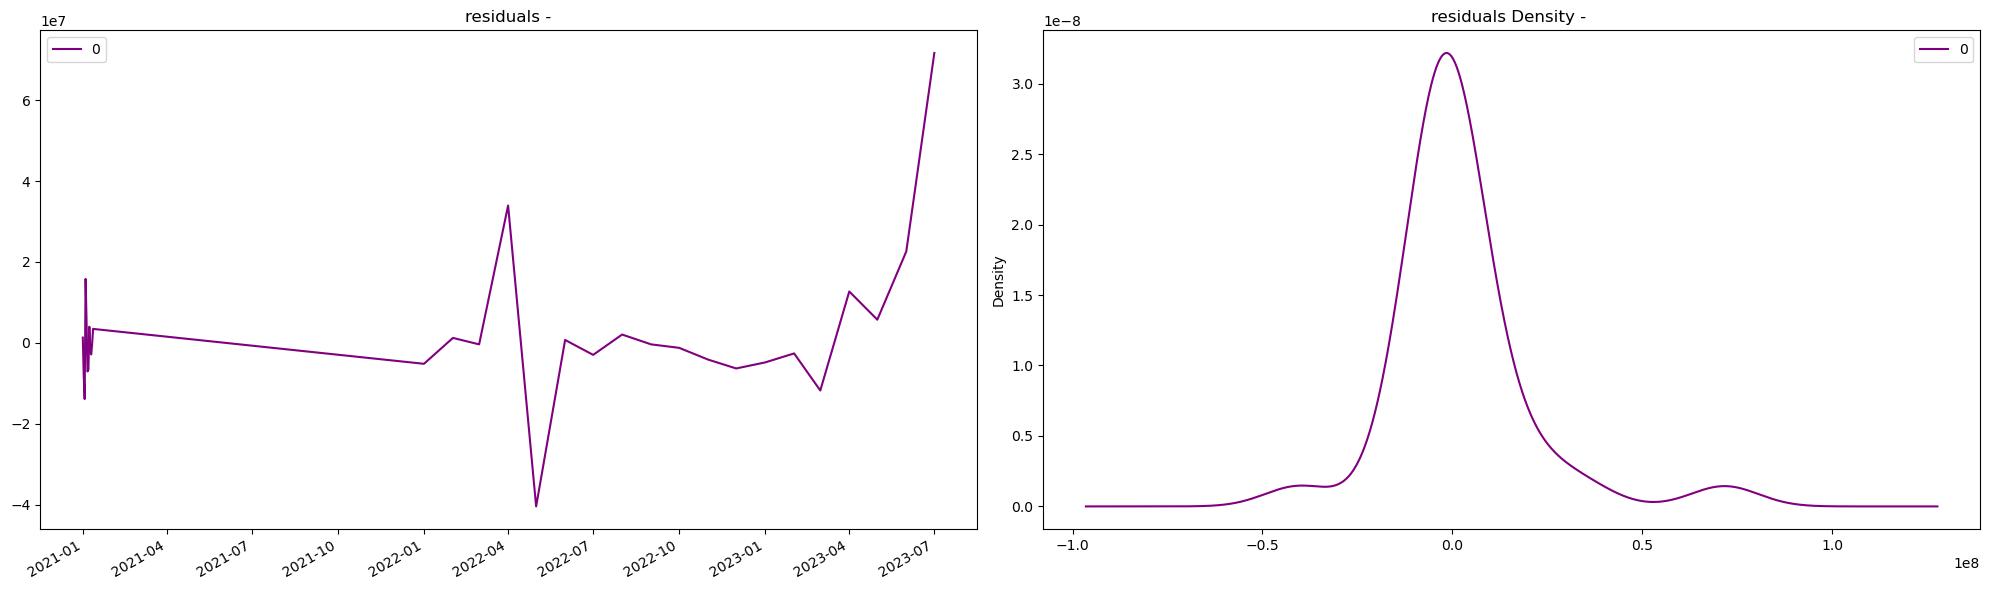

In [207]:
fig, axes = plt.subplots(1, 2, figsize=(20, 6))

# line plot of residuals
residuals = pd.DataFrame(model_fit.resid)
residuals.plot(ax=axes[0],c='purple')
axes[0].set_title('residuals -')

# density plot of residuals
residuals.plot(kind='kde',ax=axes[1],c='purple')
axes[1].set_title('residuals Density - ')

plt.tight_layout()
plt.show()

In [208]:
# summary stats of residuals
print(residuals.describe())

                 0
count        31.00
mean    1935403.13
std    17755403.97
min   -40431516.66
25%    -4999687.91
50%     -367438.63
75%     3723731.62
max    71664666.52


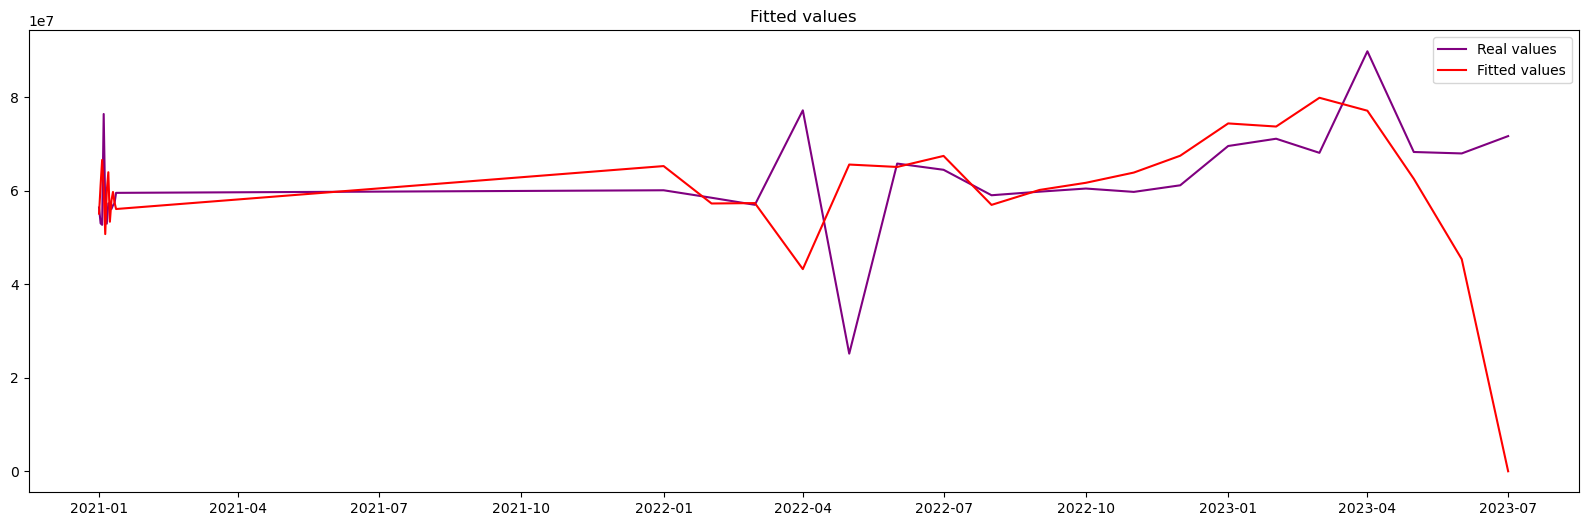

In [209]:
plt.subplots(1, 1, figsize=(20, 6))

plt.plot(data_train,color='purple')
plt.plot(model_fit.fittedvalues, color='r')
plt.title('Fitted values')
plt.legend(['Real values','Fitted values'])

plt.show()

### d. Forecast

In [210]:
print("Training Data Range:", data_train.index.min(), "to", data_train.index.max())
print("Forecast Data Range:", forecast_index.min(), "to", forecast_index.max())
forecast_index[0]
#forecast_index[-1]

Training Data Range: 2021-01-01 00:00:00 to 2023-07-01 00:00:00
Forecast Data Range: 2023-08-01 00:00:00 to 2023-12-01 00:00:00


Timestamp('2023-08-01 00:00:00')

In [ ]:
forecast = model_fit.predict(start=forecast_index[0], end=forecast_index[-1])

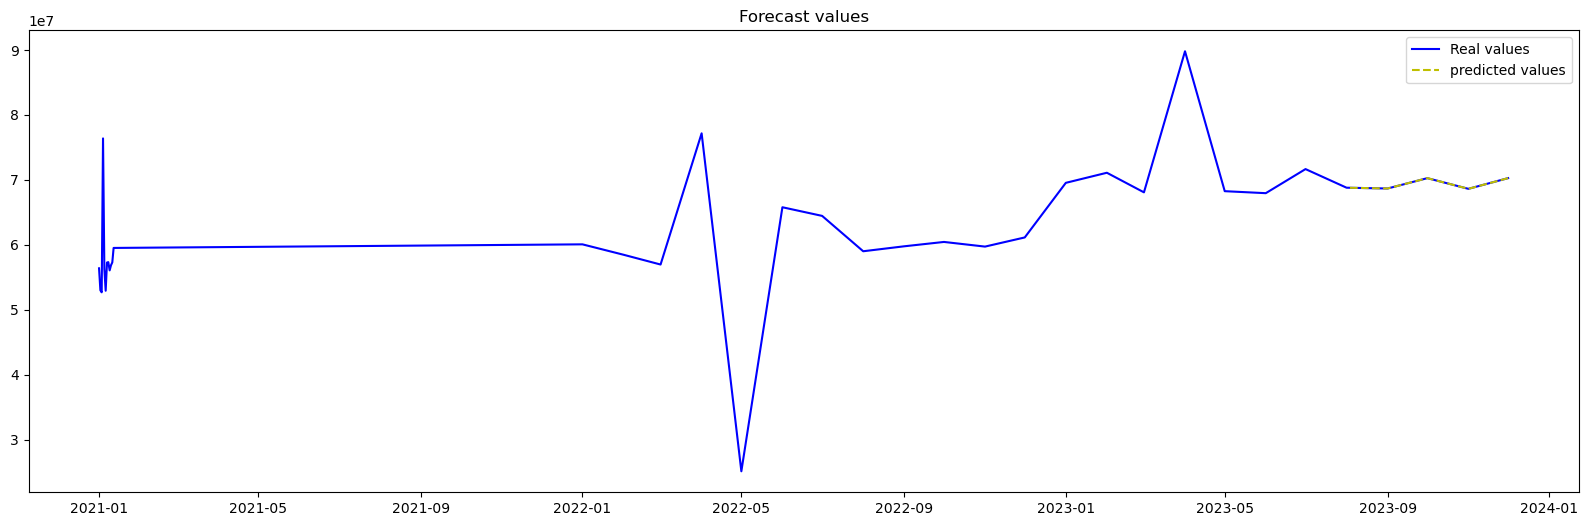

In [213]:
plt.subplots(1, 1, figsize=(20, 6))

plt.plot(data,color='b')
plt.plot(data_forecast, color='y', linestyle='--')
#plt.plot(forecast, color='r')
plt.title('Forecast values')
plt.legend(['Real values','predicted values'])

plt.show()